# Text Objects Tutorial<a id='top'></a>

This tutorial is for creating and manipulating text objects using [CDAT](https://uvcdat.llnl.gov)'s VCS.


© Software was developed by Charles Doutriaux and CDAT team, and tutorial was written by Charles Doutriaux (February 2018)

## Contents: 
([Top](#top))
- [Create VCS canvas](#vcs)
- [Basic Text](#basic)
- [Basic Controls](#basic_controls)
  - [Text Table Objects](#tt)
    - [Fonts](#font)
    - [Color](#color)
    - [Position](#pos)
  - [Text Orientation Objects](#to)
    - [Size](#size)
    - [Angle](#angle)
    - [Horizontal Alignement](#hor)
    - [Vertical Alignement](#ver)
- [Altering the viewport](#vp)
- [Altering the worldcoordinates](#wc)
- [Bringing it all together: Adding text on top of plots](#overlay)
- [Utilities](#utils)

## Create VCS canvas<a id='vcs'></a>
([Top](#top))

In [1]:
import vcs
x = vcs.init(bg=True, geometry=(800,600))

## Basic Text<a id='basic'></a>
([Top](#top)

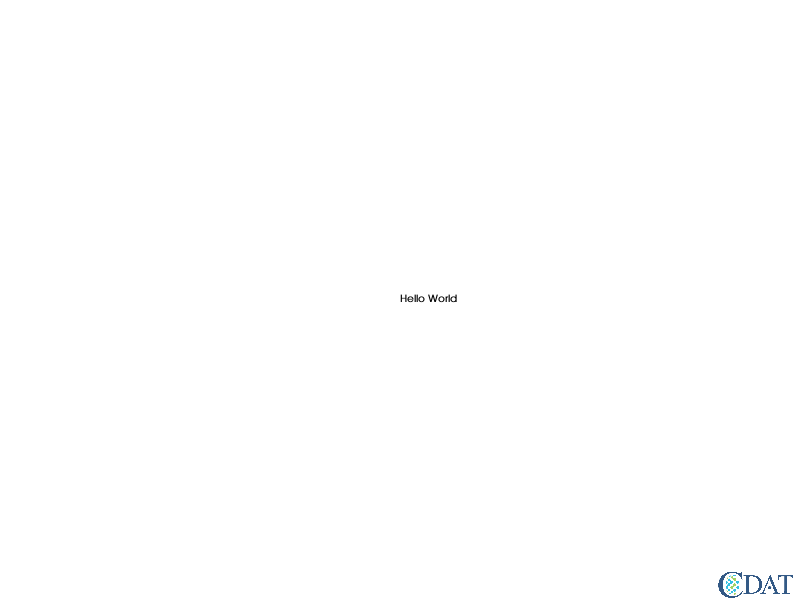

In [2]:
# Create a text object
txt = vcs.createtext()
txt.x = [.5]
txt.y = [.5]
txt.string= ['Hello World']
x.plot(txt)

## Basic Controls <a id='basic_controls'></a>
Text objects are really a combination of two type of VCS objects, a texttable object and a textorientation object
you can see this by using the `list` function

In [3]:
txt.list()

---------- Text combined (Tc) member (attribute) listings ----------
secondary method = Tc
 ---------- Text Table (Tt) member (attribute) listings ----------
Tt_name = __texttable_540587217932721
font = 1
spacing = 2
expansion = 100
color = [0.0, 0.0, 0.0, 100.0]
fillincolor = 0
priority = 1
string = ['Hello World']
viewport = [0.0, 1.0, 0.0, 1.0]
worldcoordinate = [0.0, 1.0, 0.0, 1.0]
x = [0.5]
y = [0.5]
projection = default
 ---------- Text Orientation (To) member (attribute) listings ----------
To_name = __textorientation_241302690227980
height = 14
angle = 0
path = right
halign = left
valign = half


### Texttable <a id="tt"></a>

The text table is mainly used to control the following:
- font: which font to use
- spacing: deprecated and not used
- expansion: deprecated and not used
- color: string or rgb[a]
- fillincolor: deprecated and not used
- priority: essentially the layer on the canvas onto which to draw the text
- string: message to draw
- viewport: area f interest on the vcs canvas (see bellow)
- worldcoordinate: corner values of the area of interest above (see bellow)
- x: x postiion (to be located using worldcoordinate above)
- y: y position (to be located using worldcoordinate above)
- projection: if we want to use a projection -> vcs projection object

#### Fonts<a id="font"></a>

You can obtain the list of fonts available via:

In [4]:
vcs.listelements("font")

['Adelon',
 'Arabic',
 'AvantGarde',
 'Chinese',
 'Clarendon',
 'Courier',
 'DejaVuSans',
 'DejaVuSans-Bold',
 'DejaVuSans-BoldOblique',
 'DejaVuSans-ExtraLight',
 'DejaVuSans-Oblique',
 'DejaVuSansCondensed',
 'DejaVuSansCondensed-Bold',
 'DejaVuSansCondensed-BoldOblique',
 'DejaVuSansCondensed-Oblique',
 'Greek',
 'Hebrew',
 'Helvetica',
 'Maths1',
 'Maths2',
 'Maths3',
 'Maths4',
 'Russian',
 'Times',
 'default']

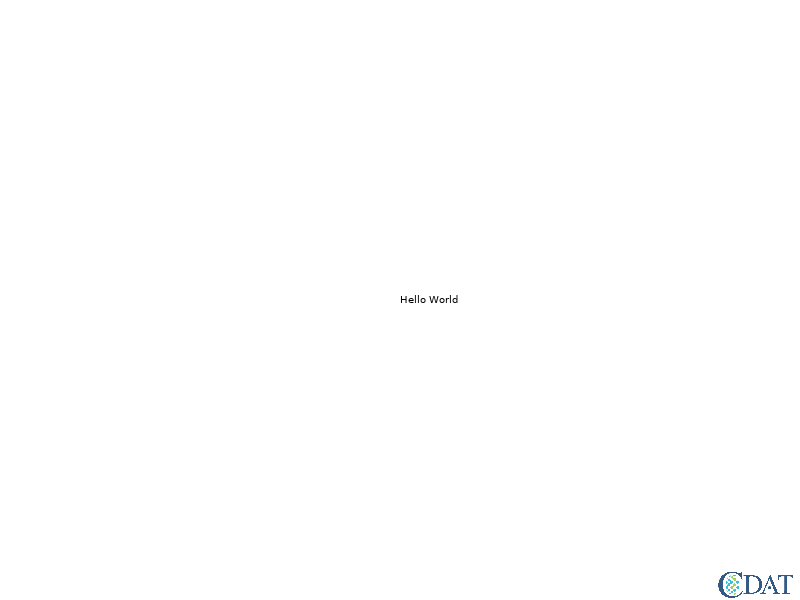

In [5]:
txt.font = "DejaVuSans"
x.clear()
x.plot(txt)

You can also load your custom fonts

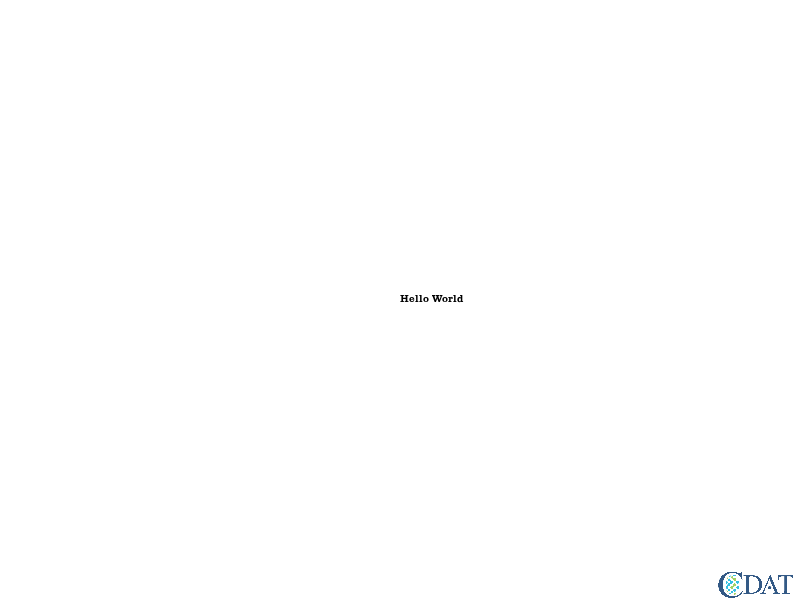

In [6]:
import os, sys
x.addfont(os.path.join(sys.prefix,"share","vcs","Clarendon.ttf"),"newfont")
txt.font = "newfont"
x.clear()
x.plot(txt)

#### Color <a id='color'></a>

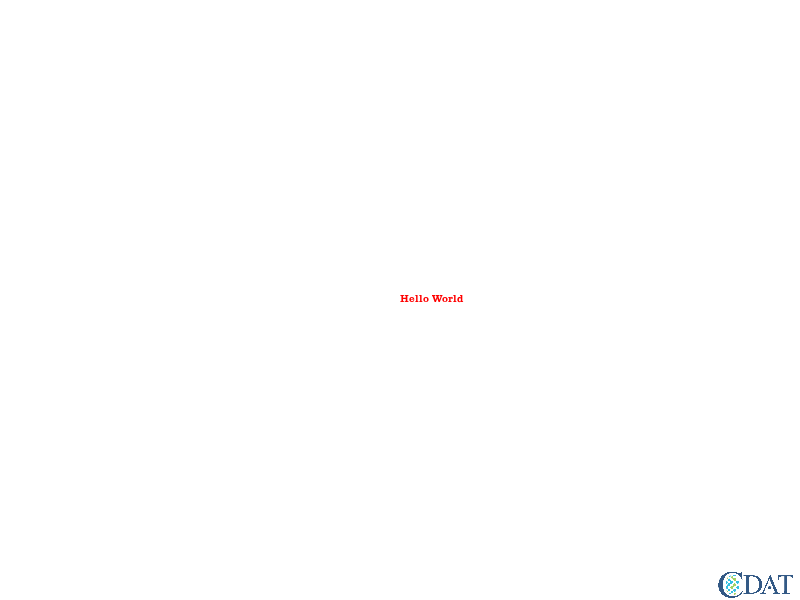

In [7]:
txt.color = (100,0,0,25)  # or color index or string e.g "pink"
x.clear()
x.plot(txt)

#### Position<a id='pos'></a>

The coordinates x/y control where the text will be plotted.
The worldcoordinate attribute determine the coordiante values at the corner of the areawhere we can plot, this area is called viewport and covers the whole canvas by default. 

By default the lower-left corner has coordinate (0, 0) and the upper-right (1,1)

To move the text closer from the upper-right corner one can do:

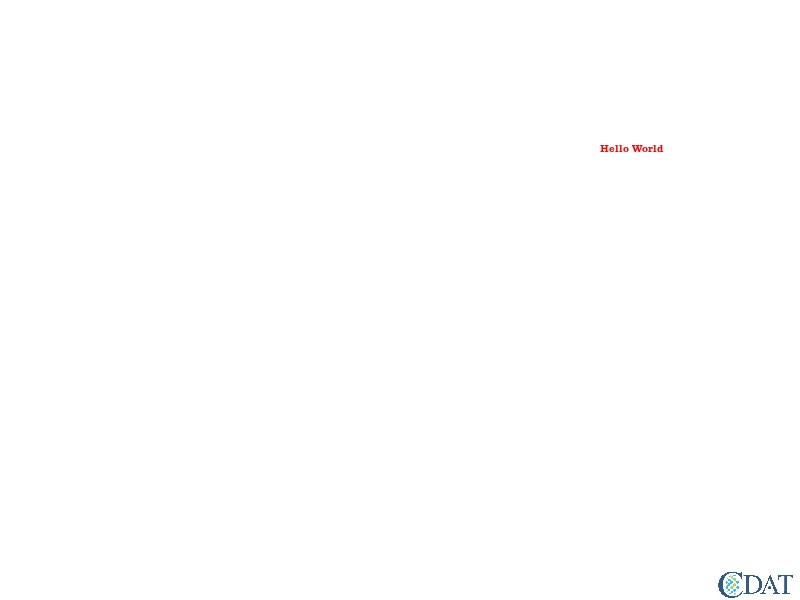

In [8]:
txt.x = .75
txt.y = .75
x.clear()
x.plot(txt)

### Textorientation <a id="tt"></a>

The other component of a text object is the text orientation. It is mainly used to control the following:
- height: size of the text
- angle: rotation of the text (positive angle means rotating clockwise)
- path: deprecated no longer used
- halign: horizontal alignment
- valign: vertical alignment

#### Size <a id='size'></a>

The height attribute allows to control the font's size

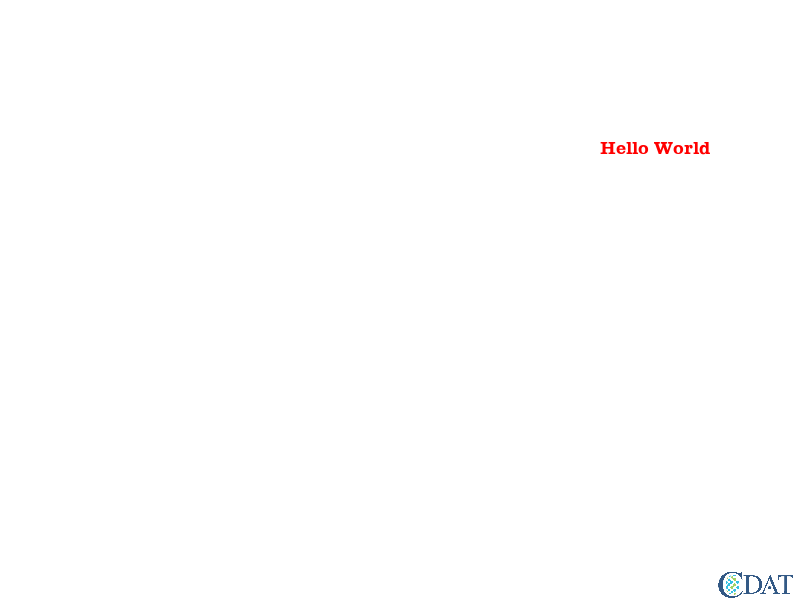

In [9]:
txt.height = 25
x.clear()
x.plot(txt)

#### Angle <a id='angle'></a>

One can rotate the text as follow (positive angle in degrees mean clockwise rotation)

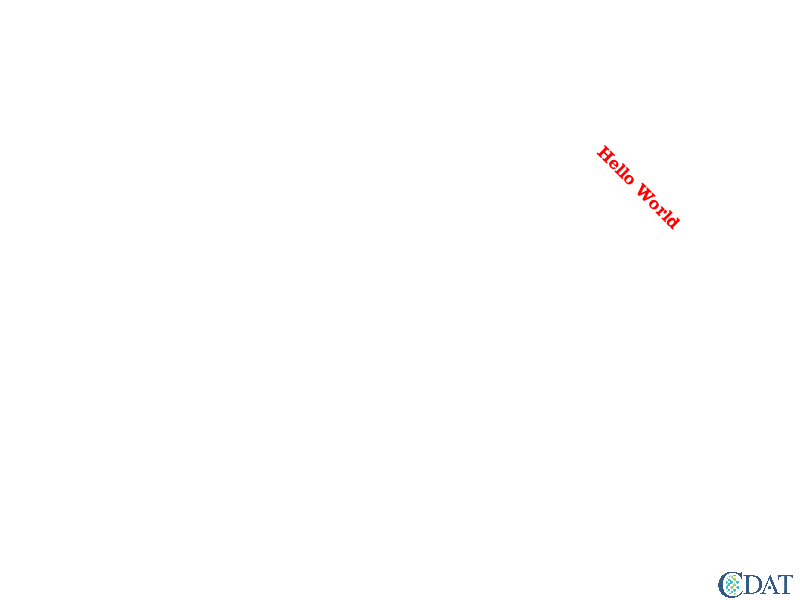

In [10]:
txt.angle = 45
x.clear()
x.plot(txt)

#### Horizontal Alignement <a id='hor'></a>

The text can also be aligned horizontally, valid options are "left", "center", "right"


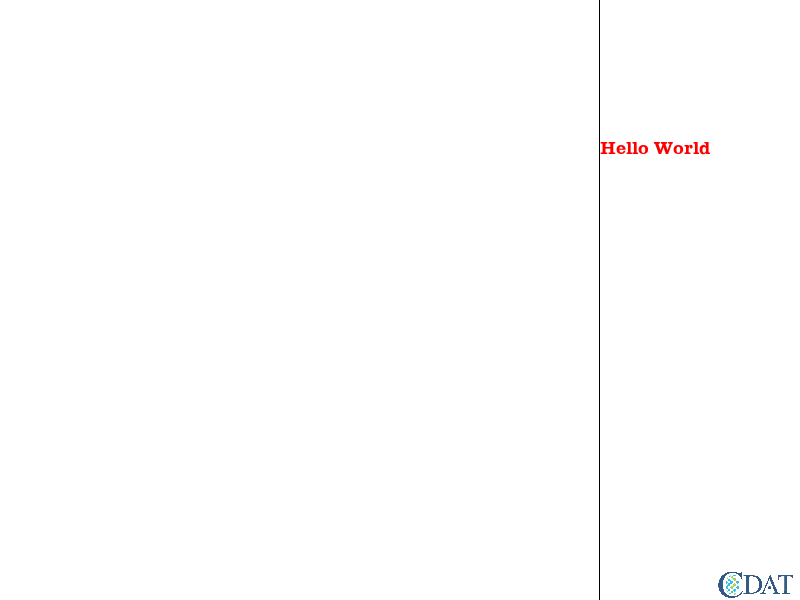

In [14]:
txt.angle=0
# let's create a line to see alignment
line = vcs.createline()
line.x = txt.x, txt.x
line.y = 0,1
txt.halign = "left"
x.clear()
x.plot(line)
x.plot(txt)

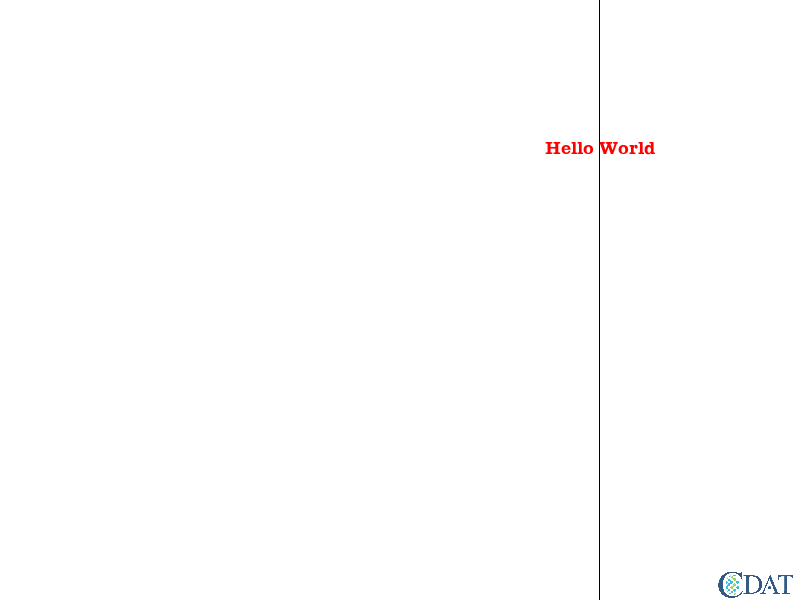

In [15]:
txt.halign="center"
x.clear()
x.plot(txt)
x.plot(line)

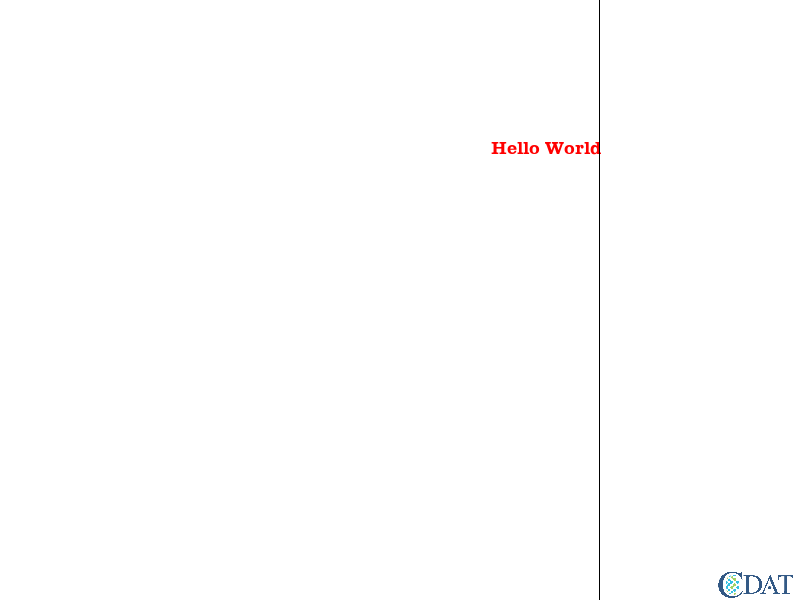

In [17]:
txt.halign="right"
x.clear()
x.plot(txt)
x.plot(line)

#### Vertical Alignement <a id='hor'></a>

The text can also be aligned vertically, valid options are "top", "half", "bottom", "cap"


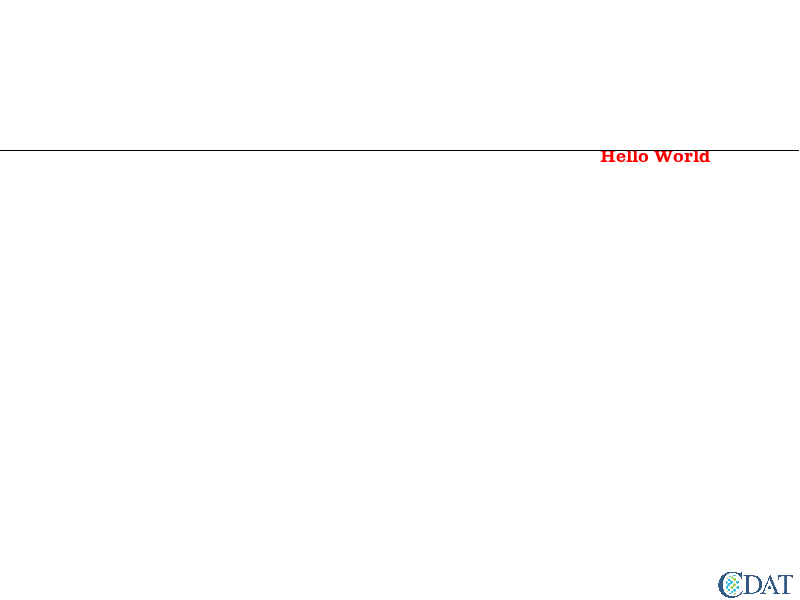

In [19]:
line.y = txt.y, txt.y
line.x = 0,1
txt.halign="left"  #default
txt.valign = "top" # Top of string is aligned
x.clear()
x.plot(txt)
x.plot(line)

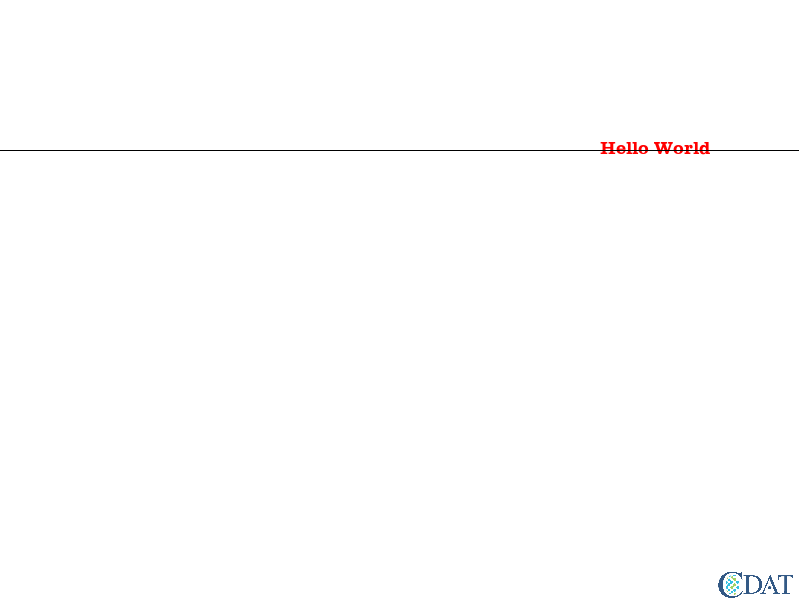

In [20]:
txt.valign = "half" # Center of string is aligned
x.clear()
x.plot(txt)
x.plot(line)

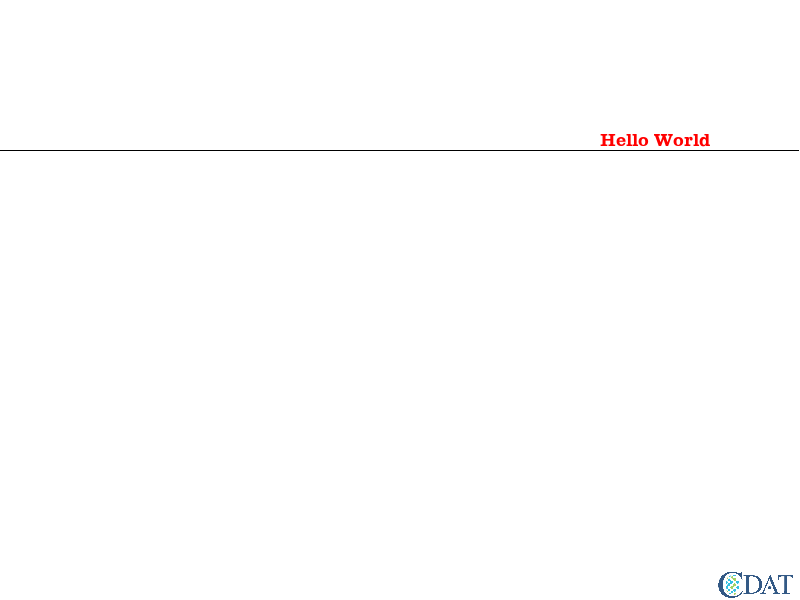

In [23]:
txt.valign = "bottom" # Bottom of string is aligned
x.clear()
x.plot(txt)
x.plot(line)

## Worldcoordinate<a id='wc'></a>
([Top](#top))

Sometimes we would like to position the text based on actual coordinate rather than % of the page.
In order to do this we need to let VCS know about the coordinates of its viewing area.

Assuming we are drawing on a worldmap:

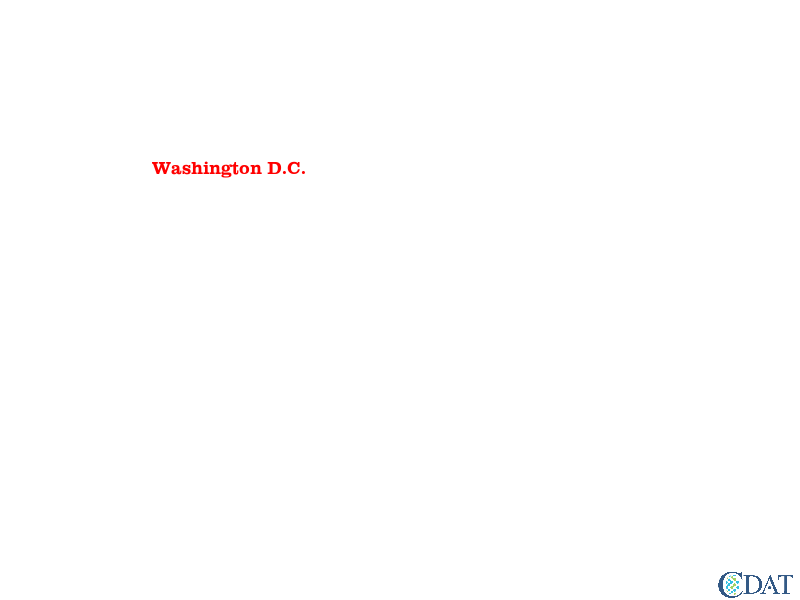

In [25]:
txt.halign = "center"
txt.valign = "half"
txt.worldcoordinate = [-180,180, -90,90]
txt.x = -77.0369
txt.y = 38.9072
txt.string = "Washington D.C."
x.clear()
x.plot(txt)

## Viewport<a id='vp'></a>
([Top](#top))

Sometimes we do not want the coordinate system to cover the whole page, but rather an area where data was plotted.

To control this are, one uses "viewport".

To move or viewport to represent the lower/right part of the canvas we would do:

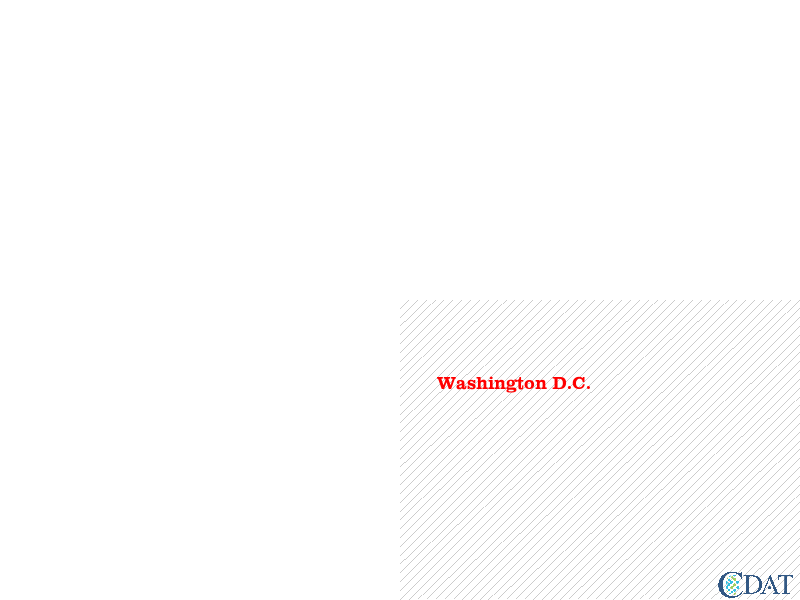

In [49]:
txt.viewport=[0.5,1,0,.5] #xs then ys
fa = vcs.createfillarea()
fa.x = [0.5, 1, 1, .5]
fa.y = [0, 0, .5, .5]
fa.color=[(80,80,80)]
fa.style="hatch"
fa.index=12
x.clear()
x.plot(fa)
x.plot(txt) # we do not need to tweak or text object coordinates at all

## Bringing it all together: Adding text on top of plots <a id="overlay"></a>

Let's plot washington DC on a map of the U.S.A.

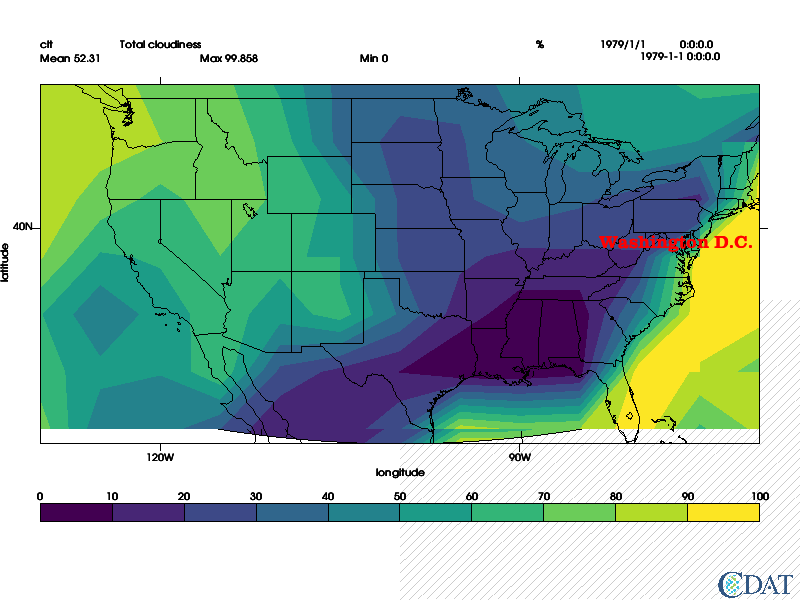

In [56]:
vcs.download_sample_data_files()
import cdms2
f = cdms2.open(vcs.sample_data+"/clt.nc")
lon1 = -130.
lon2 = -70.
lat1= 25.
lat2 = 50
s = f("clt",latitude=(lat1,lat2), longitude=(lon1, lon2))
tmpl = vcs.createtemplate()
iso = vcs.createisofill()
iso.datawc_x1 = lon1
iso.datawc_x2 = lon2
iso.datawc_y1 = lat1
iso.datawc_y2 = lat2

txt.viewport = [tmpl.data.x1, tmpl.data.x2, tmpl.data.y1, tmpl.data.y2]
txt.worldcoordinate = [lon1, lon2, lat1, lat2]

x.plot(s,tmpl,iso, continents=3)
x.plot(txt)